# Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from datetime import datetime,date
import copy
url = 'https://github.com/PisutSukpool/BADS7105-CRM-analytics-and-intelligence/raw/main/Homework%201/Customer%20Behaviors%20(Responses).xls' 
df = pd.read_excel(url) 
df

,Timestamp,คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารญี่ปุ่น],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารจึน],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารไทย],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารอีสาน],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารสุขภาพ],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [บุฟเฟต์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ชาบูชาบู],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ปิ้งย่าง],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [เหล้าเบียร์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [เสื้อผ้าแฟชั่น],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [แต่งหน้า],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [skincare บำรุงผิว],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การออกกำลังกาย],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การเล่นเกมส์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การท่องเที่ยว],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การอ่านหนังสือ],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การอ่านบทความ Online],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การเรียน e-learning],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Series],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดูหนัง],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Youtube],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Netflix],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content ด้านบันเทิง],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่่ยวกับเกมส์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการ review ร้านอาหาร],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการท่องเที่ยว],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการแต่งบ้าน],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการโทรทัศน์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับละคร],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการเมือง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารญี่ปุ่น],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารจึน],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารไทย],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารอีสาน],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารสุขภาพ],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [บุฟเฟต์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ชาบูชาบู],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ปิ้งย่าง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [เหล้าเบียร์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [เสื้อผ้าแฟชั่น],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [แต่งหน้า],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [skincare บำรุงผิว],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การออกกำลังกาย],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การเล่นเกมส์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การท่องเที่ยว],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การอ่านหนังสือ],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การอ่านบทความ Online],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การเรียน e-learning],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Series],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดูหนัง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Youtube],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Netflix],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content ด้านบันเทิง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่่ยวกับเกมส์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการ review ร้านอาหาร],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการท่องเที่ยว],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการแต่งบ้าน],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการโทรทัศน์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับละคร],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการเมือง],นอกเหนือจากรายการดังกล่าวแล้ว คุณมีความสนใจในเรื่องใดอีกบ้าง,คุณเกิดวันที่เท่าไหร่,เพศ
0,2021-01-09 10:07:27.365,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจ,สนใจ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,เฉยๆ,ไม่สนใจ,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจอย่างมาก,สนใจ,สนใจอย่างมากที่สุด,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจอย่างมากที่สุด,เดือนละ 2-3 ครั้ง,หลายเดือนครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,หลายเดือนครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 คร

# Config Thai Characters

In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [ ]:
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font',family='TH Sarabun New',size=20)

# Cleansing Dataframe

In [ ]:
today = datetime.today()
df_encode = pd.DataFrame()
ls=[]
df = df.drop(columns=['Timestamp'])
df.index = np.arange(1, len(df)+1)
df.columns = df.columns.str.replace('คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด','Interest')
df.columns = df.columns.str.replace('คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน','Consume')
df.columns = df.columns.str.replace('นอกเหนือจากรายการดังกล่าวแล้ว คุณมีความสนใจในเรื่องใดอีกบ้าง','Addition') 
df.columns = df.columns.str.replace('คุณเกิดวันที่เท่าไหร่','BirthDay')
df.columns = df.columns.str.replace('เพศ','Gender')
df = df.assign(key = [int(index) for index, row in df.iterrows()])
df = df.assign(today = [today for i in df['key']])
for index, row in df.iterrows():
    if row['BirthDay'].year > date.today().year:
        row['BirthDay'] = row['BirthDay'] - relativedelta(years=543)
    else:
        row['BirthDay']
    ls.append([int(index),row['BirthDay']])
df_prep_date = pd.DataFrame(ls,columns=['key','BD_cls'])
df_cls = pd.merge(df, df_prep_date, on =['key', 'key'])
df_cls['Age'] = round(((df_cls['today']-df_cls['BD_cls']).dt.days)/365)
df_cls = df_cls.drop(columns= ['today','BirthDay','BD_cls'])
df_option = df_cls[['key', 'Addition']].copy()
df_cls = df_cls.drop(columns= ['Addition'])
df_cls

,Interest [อาหารญี่ปุ่น],Interest [อาหารจึน],Interest [อาหารไทย],Interest [อาหารอีสาน],Interest [อาหารสุขภาพ],Interest [บุฟเฟต์],Interest [ชาบูชาบู],Interest [ปิ้งย่าง],Interest [เหล้าเบียร์],Interest [เสื้อผ้าแฟชั่น],Interest [แต่งหน้า],Interest [skincare บำรุงผิว],Interest [การออกกำลังกาย],Interest [การเล่นเกมส์],Interest [การท่องเที่ยว],Interest [การอ่านหนังสือ],Interest [การอ่านบทความ Online],Interest [การเรียน e-learning],Interest [ดู Series],Interest [ดูหนัง],Interest [ดู Youtube],Interest [ดู Netflix],Interest [Content ด้านบันเทิง],Interest [Content เกี่่ยวกับเกมส์],Interest [Content เกี่ยวกับการ review ร้านอาหาร],Interest [Content เกี่ยวกับการท่องเที่ยว],Interest [Content เกี่ยวกับการแต่งบ้าน],Interest [Content เกี่ยวกับการโทรทัศน์],Interest [Content เกี่ยวกับละคร],Interest [Content เกี่ยวกับการเมือง],Consume [อาหารญี่ปุ่น],Consume [อาหารจึน],Consume [อาหารไทย],Consume [อาหารอีสาน],Consume [อาหารสุขภาพ],Consume [บุฟเฟต์],Consume [ชาบูชาบู],Consume [ปิ้งย่าง],Consume [เหล้าเบียร์],Consume [เสื้อผ้าแฟชั่น],Consume [แต่งหน้า],Consume [skincare บำรุงผิว],Consume [การออกกำลังกาย],Consume [การเล่นเกมส์],Consume [การท่องเที่ยว],Consume [การอ่านหนังสือ],Consume [การอ่านบทความ Online],Consume [การเรียน e-learning],Consume [ดู Series],Consume [ดูหนัง],Consume [ดู Youtube],Consume [ดู Netflix],Consume [Content ด้านบันเทิง],Consume [Content เกี่่ยวกับเกมส์],Consume [Content เกี่ยวกับการ review ร้านอาหาร],Consume [Content เกี่ยวกับการท่องเที่ยว],Consume [Content เกี่ยวกับการแต่งบ้าน],Consume [Content เกี่ยวกับการโทรทัศน์],Consume [Content เกี่ยวกับละคร],Consume [Content เกี่ยวกับการเมือง],Gender,key,Age
0,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจ,สนใจ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,เฉยๆ,ไม่สนใจ,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจอย่างมาก,สนใจ,สนใจอย่างมากที่สุด,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจอย่างมากที่สุด,เดือนละ 2-3 ครั้ง,หลายเดือนครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,หลายเดือนครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,เดือนละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,แทบทุกวัน,ชาย,1,32.0
1,สนใจอย่างมาก,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจ,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมาก,ไม่สนใจ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจอย่างมาก,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมาก,เฉยๆ,เฉยๆ,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,ไม่สนใจ,สนใจ,อาทิตย์ละครั้ง,หลายเดือนครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,แทบไม่ได้บริโภคเลย,เดือนละครั้ง,แทบไม่ได้บริโภคเลย,เดือนละครั้ง,แทบทุกวัน,แทบทุกวัน,เดือนละครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,หลายเดือนครั้ง,อาทิตย์ละครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,เดือนละ 2-3 ครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,หลายเดือนครั้ง,หลายเดือนครั้ง,อาทิตย์ละครั้ง,หญิง,2,27.0
2,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมาก,สนใจ,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,ไม่สนใจอย่างมาก,เฉยๆ,ไม่สนใจอย่างมากที่สุด,ไม่สนใจอย่างมาก,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมาก,ไม่สนใจ,สนใจอย่างมากที่สุด,อาทิตย์ละครั้ง,หลายเดือนครั้ง,แทบทุกวัน,หลายเดือนครั้ง,หลายเดือนครั้ง,เดือนละครั้ง,เดือนละครั้ง,เดือนละครั้ง,แทบไม่ได้บริโภคเลย,แทบไม่ได้บริโภคเลย,แทบไม่ได้บริโภคเลย,แทบไม่ได้บริโภคเลย,หลายเดือนครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,แทบทุกวัน,แทบทุกวัน,แทบทุกวัน,แทบทุกวัน,แทบทุกวัน,แทบทุกวัน,แทบทุกวัน,เดือนละ 2-3 ครั

# Encode Ordinal Scale

In [ ]:
mapper = {'ไม่สนใจอย่างมากที่สุด' : 1 ,
          'ไม่สนใจอย่างมาก' : 2 ,
          'ไม่สนใจ' : 3 ,
          'เฉยๆ' : 4 ,
          'สนใจ' : 5 ,
          'สนใจอย่างมาก' : 6 ,
          'สนใจอย่างมากที่สุด' : 7 ,
          
          'แทบไม่ได้บริโภคเลย' : 1 ,
          'หลายเดือนครั้ง' : 2 ,
          'เดือนละครั้ง' : 3 ,
          'เดือนละ 2-3 ครั้ง' : 4 ,
          'อาทิตย์ละครั้ง' : 5 ,
          'แทบทุกวัน' : 6 ,
          
          'ชาย' : 0 ,
          'หญิง' : 1 ,
          'ไม่ต้องการระบุ' : 2
         }
df_encode = df_cls.replace(mapper)
df_encode

,Interest [อาหารญี่ปุ่น],Interest [อาหารจึน],Interest [อาหารไทย],Interest [อาหารอีสาน],Interest [อาหารสุขภาพ],Interest [บุฟเฟต์],Interest [ชาบูชาบู],Interest [ปิ้งย่าง],Interest [เหล้าเบียร์],Interest [เสื้อผ้าแฟชั่น],Interest [แต่งหน้า],Interest [skincare บำรุงผิว],Interest [การออกกำลังกาย],Interest [การเล่นเกมส์],Interest [การท่องเที่ยว],Interest [การอ่านหนังสือ],Interest [การอ่านบทความ Online],Interest [การเรียน e-learning],Interest [ดู Series],Interest [ดูหนัง],Interest [ดู Youtube],Interest [ดู Netflix],Interest [Content ด้านบันเทิง],Interest [Content เกี่่ยวกับเกมส์],Interest [Content เกี่ยวกับการ review ร้านอาหาร],Interest [Content เกี่ยวกับการท่องเที่ยว],Interest [Content เกี่ยวกับการแต่งบ้าน],Interest [Content เกี่ยวกับการโทรทัศน์],Interest [Content เกี่ยวกับละคร],Interest [Content เกี่ยวกับการเมือง],Consume [อาหารญี่ปุ่น],Consume [อาหารจึน],Consume [อาหารไทย],Consume [อาหารอีสาน],Consume [อาหารสุขภาพ],Consume [บุฟเฟต์],Consume [ชาบูชาบู],Consume [ปิ้งย่าง],Consume [เหล้าเบียร์],Consume [เสื้อผ้าแฟชั่น],Consume [แต่งหน้า],Consume [skincare บำรุงผิว],Consume [การออกกำลังกาย],Consume [การเล่นเกมส์],Consume [การท่องเที่ยว],Consume [การอ่านหนังสือ],Consume [การอ่านบทความ Online],Consume [การเรียน e-learning],Consume [ดู Series],Consume [ดูหนัง],Consume [ดู Youtube],Consume [ดู Netflix],Consume [Content ด้านบันเทิง],Consume [Content เกี่่ยวกับเกมส์],Consume [Content เกี่ยวกับการ review ร้านอาหาร],Consume [Content เกี่ยวกับการท่องเที่ยว],Consume [Content เกี่ยวกับการแต่งบ้าน],Consume [Content เกี่ยวกับการโทรทัศน์],Consume [Content เกี่ยวกับละคร],Consume [Content เกี่ยวกับการเมือง],Gender,key,Age
0,5,5,7,6,5,5,5,5,7,4,3,5,6,6,4,5,5,7,6,6,5,7,5,6,6,4,4,4,4,7,4,2,6,5,6,4,4,3,5,2,2,6,6,5,4,4,4,4,4,5,5,5,2,3,4,4,4,4,4,6,0,1,32.0
1,6,4,7,6,5,6,7,6,3,4,4,4,6,6,7,7,7,7,4,7,7,6,4,4,6,7,7,4,3,5,5,2,6,5,5,4,4,4,1,3,1,3,6,6,3,6,6,5,2,5,6,4,3,4,6,6,5,2,2,5,1,2,27.0
2,7,4,6,5,4,7,7,7,2,4,1,2,5,7,7,7,7,4,7,7,7,7,7,7,7,7,7,6,3,7,5,2,6,2,2,3,3,3,1,1,1,1,2,5,2,6,4,4,6,6,6,6,6,6,6,4,4,4,2,6,0,3,27.0
3,5,4,4,4,5,5,5,5,1,1,1,7,6,7,7,5,5,6,7,7,7,7,1,7,4,5,4,3,1,6,3,1,6,4,1,3,3,3,1,1,1,6,3,4,2,4,4,4,5,5,5,5,1,6,3,3,1,1,1,4,0,4,27.0
4,6,5,5,5,7,4,4,4,4,4,5,6,7,3,5,6,5,5,7,7,4,7,4,3,4,5,5,3,3,4,4,3,5,5,6,2,2,2,3,3,6,6,6,1,2,4,5,4,5,5,4,5,3,1,3,4,3,1,1,4,1,5,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,5,7,7,7,7,4,4,4,4,5,4,5,7,3,5,6,6,7,7,7,6,5,7,3,4,4,4,6,7,4,2,2,6,4,2,2,2,2,2,2,1,2,5,1,1,6,6,6,6,1,6,1,6,1,3,2,2,6,6,5,1,59,47.0
59,6,5,6,5,7,6,7,6,4,5,2,5,7,7,7,5,6,6,7,7,7,7,7,5,5,7,2,4,5,6,2,2,6,4,4,4,4,3,2,2,1,2,4,6,3,4,6,4,6,6,6,4,5,4,2,3,1,1,2,5,0,60,31.0
60,5,4,6,6,5,2,4,5,3,6,6,6,5,5,7,4,5,5,6,5,6,6,4,5,5,6,5,4,4,4,3,2,6,5,5,2,2,3,2,4,5,6,5,5,3,3,4,5,5,3,6,5,4,5,6,6,4,3,3,4,1,61,27.0
61,7,5,6,6,6,7,7,7,4,5,6,7,4,7,7,5,5,6,7,7,6,7,6,6,7,7,7,5,5,4,4,2,4,5,3,3,3,3,2,2,2,5,1,5,3,3,3,2,5,5,4,5,3,3,3,4,4,1,2,2,1,62,31.0


# Explore User Profile

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


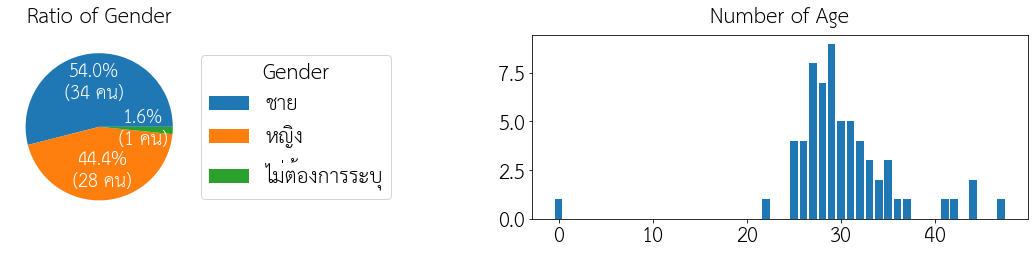

In [ ]:
#Gender
df_cls_gender= df_cls.groupby(by=['Gender']).count().to_records()
df_count_gender = pd.DataFrame([[df_cls_gender[i][0] ,df_cls_gender[i][1]] for i in range(len(df_cls_gender))],columns=['Gender','Count'])
df_count_gender = df_count_gender.set_index('Gender')

#Age
df_cls_age= df_cls.groupby(by=['Age']).count().to_records()
df_count_age = pd.DataFrame([[df_cls_age[i][0] ,df_cls_age[i][1]] for i in range(len(df_cls_age))],columns=['Age','Count'])
df_count_age = df_count_age.set_index('Age')
df_count_age

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} คน)".format(pct, absolute)

f, ax = plt.subplots(1, 2)
wedges, texts, autotexts = ax[0].pie(df_count_gender,labels=df_count_gender.index,autopct=lambda pct: func(pct, df_count_gender),
                                                   textprops=dict(color="w"))
ax[1].bar(df_count_age.index,df_count_age['Count'])
ax[0].legend(wedges, df_count_gender.index,
          title="Gender",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=18, weight="bold")
ax[0].set_title('Ratio of Gender', fontdict={'fontsize':20}, pad=12)
ax[1].set_title('Number of Age', fontdict={'fontsize':20}, pad=12)
f.set_figheight(5) 
f.set_figwidth(18)
f.tight_layout(pad=3)
plt.show()

# Find Correlation

In [ ]:
int_cols = [col for col in df_encode.columns if 'Interest' in col or 'Gender' in col or 'Age' in col]
df_encode_interest = df_encode[int_cols].copy()  
df_encode_interest
df_corr_interest= round(df_encode_interest.corr(method='spearman'),2)

In [ ]:
con_cols = [col for col in df_encode.columns if 'Consume' in col or 'Gender' in col or 'Age' in col]
df_encode_consume = df_encode[con_cols].copy()  
df_encode_consume
df_corr_consume= round(df_encode_consume.corr(method='spearman'),2)

# Heatmap Interest Correlation

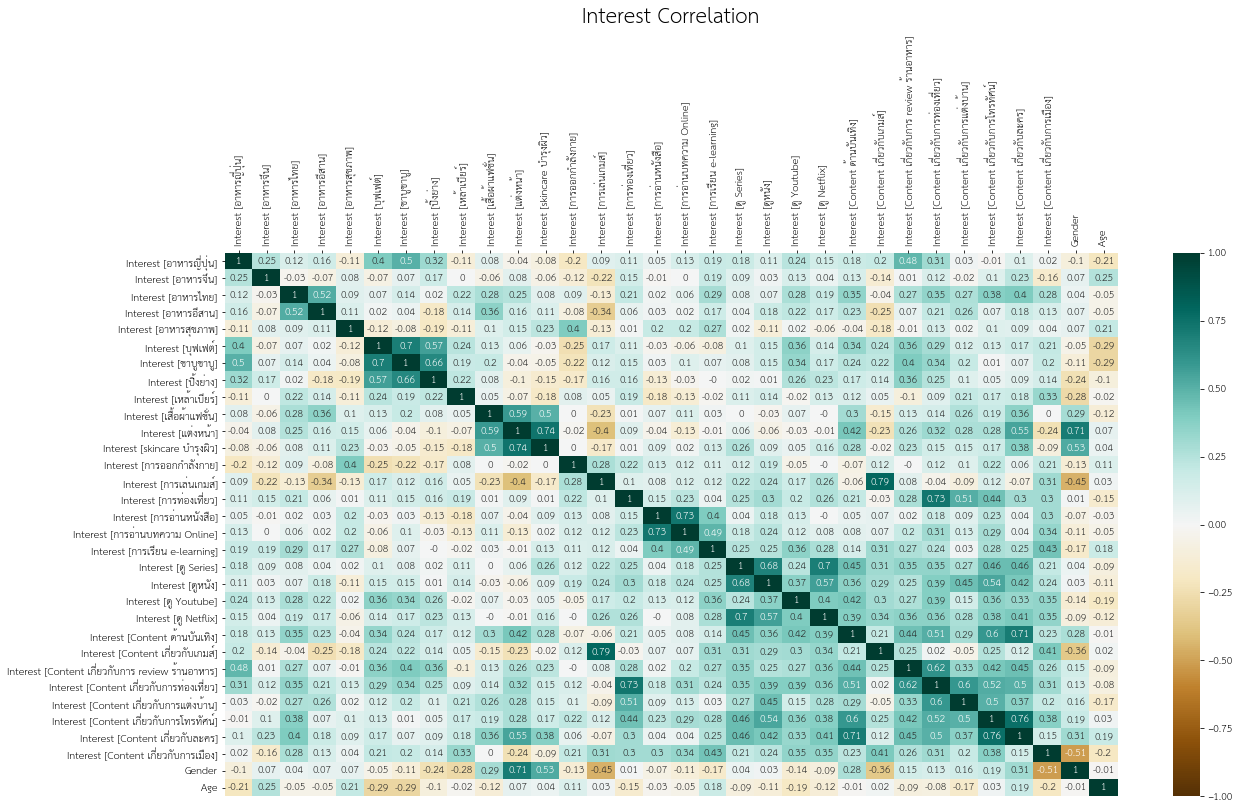

In [ ]:
mpl.rcParams.update({'font.size': 10})
plt.figure(figsize=(20, 10))
hm_interest = sns.heatmap(df_corr_interest, vmin=-1, vmax=1, annot=True, cmap='BrBG')
hm_interest.set_title('Interest Correlation', fontdict={'fontsize':20}, pad=12);
hm_interest.set_xticklabels(hm_interest.get_xticklabels(), rotation=90)
hm_interest.xaxis.tick_top()
hm_interest.xaxis.set_label_position('top')
plt.show()

# Top Interest Correlation

In [ ]:
#eliminate duplicate pairs
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop
    
#align left
def left_align(df):
    left_aligned_df = df.style.set_properties(**{'text-align': 'left'})
    left_aligned_df = left_aligned_df.set_table_styles(
        [dict(selector='th', props=[('text-align', 'left')])]
    )
    return left_aligned_df

**Top Interest Correlation Positive**

In [ ]:
#Top Interest correlation positive
labels_to_drop = get_redundant_pairs(df_encode_interest)
corr_interest_top_pos = df_corr_interest.unstack()
corr_interest_top_pos = corr_interest_top_pos.drop(labels=labels_to_drop).sort_values(ascending=False)
top_corr_interest = corr_interest_top_pos.head(20).to_frame(name='Correlation')
left_align(top_corr_interest)

,,Correlation
Interest [การเล่นเกมส์],Interest [Content เกี่่ยวกับเกมส์],0.790000
Interest [Content เกี่ยวกับการโทรทัศน์],Interest [Content เกี่ยวกับละคร],0.760000
Interest [แต่งหน้า],Interest [skincare บำรุงผิว],0.740000
Interest [การท่องเที่ยว],Interest [Content เกี่ยวกับการท่องเที่ยว],0.730000
Interest [การอ่านหนังสือ],Interest [การอ่านบทความ Online],0.730000
Interest [Content ด้านบันเทิง],Interest [Content เกี่ยวกับละคร],0.710000
Interest [แต่งหน้า],Gender,0.710000
Interest [ดู Series],Interest [ดู Netflix],0.700000
Interest [บุฟเฟต์],Interest [ชาบูชาบู],0.700000
Interest [ดู Series],Interest [ดูหนัง],0.680000


**Top Interest Correlation Negative**


In [ ]:
labels_to_drop = get_redundant_pairs(df_encode_interest)
corr_interest_top_pos = df_corr_interest.unstack()
corr_interest_top_pos = corr_interest_top_pos.drop(labels=labels_to_drop).sort_values(ascending=True)
top_corr_interest = corr_interest_top_pos.head(20).to_frame(name='Correlation')
left_align(top_corr_interest)

,,Correlation
Interest [Content เกี่ยวกับการเมือง],Gender,-0.510000
Interest [การเล่นเกมส์],Gender,-0.450000
Interest [แต่งหน้า],Interest [การเล่นเกมส์],-0.400000
Interest [Content เกี่่ยวกับเกมส์],Gender,-0.360000
Interest [อาหารอีสาน],Interest [การเล่นเกมส์],-0.340000
Interest [ชาบูชาบู],Age,-0.290000
Interest [บุฟเฟต์],Age,-0.290000
Interest [เหล้าเบียร์],Gender,-0.280000
Interest [อาหารอีสาน],Interest [Content เกี่่ยวกับเกมส์],-0.250000
Interest [บุฟเฟต์],Interest [การออกกำลังกาย],-0.250000


In [ ]:
df_encode_interest_dg = df_encode_interest.drop(columns=['Age','Gender'])
df_interest = pd.DataFrame([ col for col in df_encode_interest_dg],columns=['Interest'])
df_gender_all = pd.DataFrame([ col for col in df['Gender']],columns=['Gender'])
df_gender = pd.DataFrame(df_gender_all.Gender.unique(),columns=['Gender'])
df_gender = df_gender.drop([2])
df_score =  pd.DataFrame([1,2,3,4,5,6,7],columns=['Score'])
ls_pairs = []
ls_row = []
for intr in df_interest['Interest']:
  for gd in df_gender['Gender']:
    ls_pairs.append(intr)
    ls_pairs.append(gd)
    ls_pairs_d = copy.deepcopy(ls_pairs)
    ls_row.append(ls_pairs_d)
    ls_pairs.clear()
df_cate = pd.DataFrame(ls_row, columns=['Interest','Gender'])

# Heatmap Consume Correlation

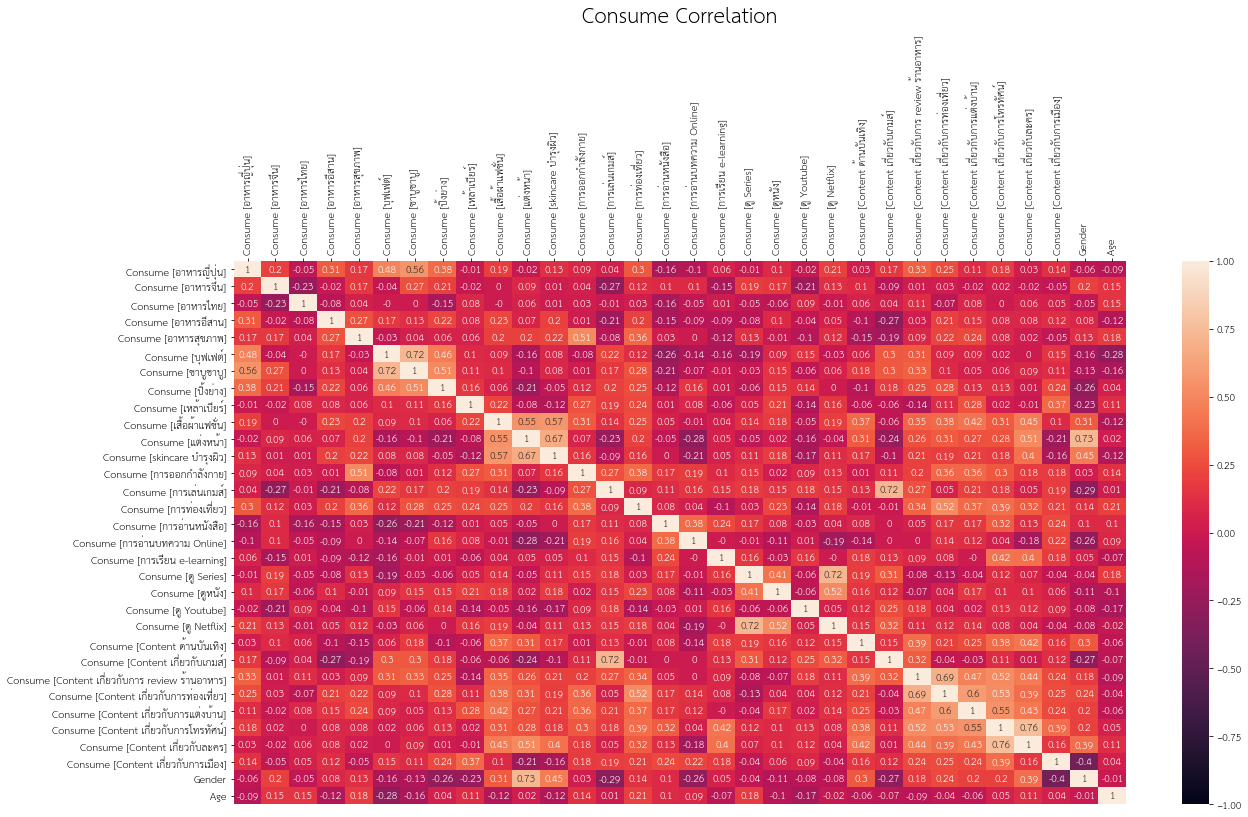

In [ ]:
mpl.rcParams.update({'font.size': 10})
plt.figure(figsize=(20, 10))
hm_consume = sns.heatmap(df_corr_consume, vmin=-1, vmax=1, annot=True)
hm_consume.set_title('Consume Correlation', fontdict={'fontsize':20}, pad=12);
hm_consume.set_xticklabels(hm_consume.get_xticklabels(), rotation=90)
hm_consume.xaxis.tick_top()
hm_consume.xaxis.set_label_position('top')
plt.show()

# Top Consume Correlation

In [ ]:
#Top Interest correlation positive
labels_to_drop = get_redundant_pairs(df_encode_consume)
corr_consume_top_pos = df_corr_consume.unstack()
corr_consume_top_pos = corr_consume_top_pos.drop(labels=labels_to_drop).sort_values(ascending=False)
top_corr_consume = corr_consume_top_pos.head(20).to_frame(name='Correlation')
left_align(top_corr_consume)

,,Correlation
Consume [Content เกี่ยวกับการโทรทัศน์],Consume [Content เกี่ยวกับละคร],0.760000
Consume [แต่งหน้า],Gender,0.730000
Consume [บุฟเฟต์],Consume [ชาบูชาบู],0.720000
Consume [การเล่นเกมส์],Consume [Content เกี่่ยวกับเกมส์],0.720000
Consume [ดู Series],Consume [ดู Netflix],0.720000
Consume [Content เกี่ยวกับการ review ร้านอาหาร],Consume [Content เกี่ยวกับการท่องเที่ยว],0.690000
Consume [แต่งหน้า],Consume [skincare บำรุงผิว],0.670000
Consume [Content เกี่ยวกับการท่องเที่ยว],Consume [Content เกี่ยวกับการแต่งบ้าน],0.600000
Consume [เสื้อผ้าแฟชั่น],Consume [skincare บำรุงผิว],0.570000
Consume [อาหารญี่ปุ่น],Consume [ชาบูชาบู],0.560000


In [ ]:
#Top Interest correlation negative
labels_to_drop = get_redundant_pairs(df_encode_consume)
corr_consume_top_pos = df_corr_consume.unstack()
corr_consume_top_pos = corr_consume_top_pos.drop(labels=labels_to_drop).sort_values(ascending=True)
top_corr_consume = corr_consume_top_pos.head(20).to_frame(name='Correlation')
left_align(top_corr_consume)

,,Correlation
Consume [Content เกี่ยวกับการเมือง],Gender,-0.400000
Consume [การเล่นเกมส์],Gender,-0.290000
Consume [บุฟเฟต์],Age,-0.280000
Consume [แต่งหน้า],Consume [การอ่านบทความ Online],-0.280000
Consume [อาหารจึน],Consume [การเล่นเกมส์],-0.270000
Consume [Content เกี่่ยวกับเกมส์],Gender,-0.270000
Consume [อาหารอีสาน],Consume [Content เกี่่ยวกับเกมส์],-0.270000
Consume [ปิ้งย่าง],Gender,-0.260000
Consume [การอ่านบทความ Online],Gender,-0.260000
Consume [บุฟเฟต์],Consume [การอ่านหนังสือ],-0.260000


# Compare Interest and Consume by Gender

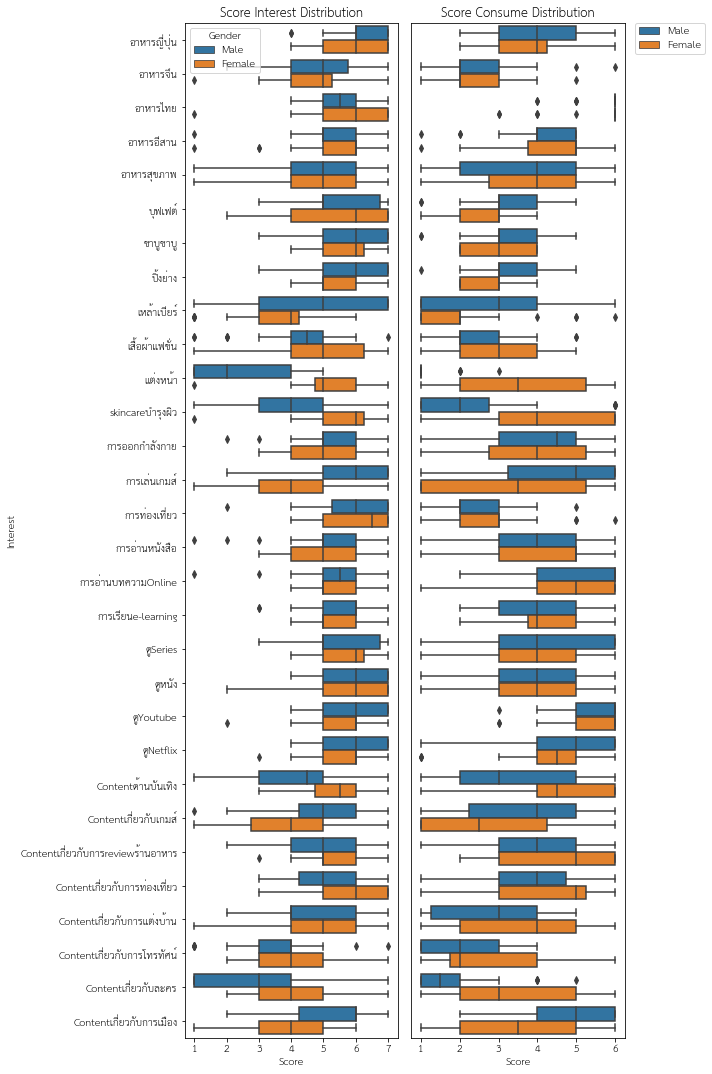

In [ ]:
#Interest--------------------------------------------------------------------------------------------------------------------
df_encode_interest_da = df_encode_interest.drop(columns=['Age'])
df_encode_interest_da = df_encode_interest_da.drop(df_encode_interest_da[df_encode_interest_da.Gender == 2].index)

df_compare_interest=[]
for col in df_encode_interest_da:
  for index,row in df_encode_interest_da.iterrows():
    if col != 'Gender':
      df_compare_interest.append([col,row[col],row['Gender']])
df_box_interest=pd.DataFrame(df_compare_interest,columns=['Interest','Score','Gender'])
df_box_interest.loc[df_box_interest.Gender == 0, 'Gender'] = 'Male'
df_box_interest.loc[df_box_interest.Gender == 1, 'Gender'] = 'Female'
df_box_interest['Interest'] = df_box_interest['Interest'].str.replace('Interest','')
df_box_interest['Interest'] = df_box_interest['Interest'].str.replace('[','')
df_box_interest['Interest'] = df_box_interest['Interest'].str.replace(']','')
df_box_interest['Interest'] = df_box_interest['Interest'].str.replace(' ','')

#Consume--------------------------------------------------------------------------------------------------------------------
df_encode_consume_da = df_encode_consume.drop(columns=['Age'])
df_encode_consume_da = df_encode_consume_da.drop(df_encode_consume_da[df_encode_consume_da.Gender == 2].index)

df_compare_consume=[]
for col in df_encode_consume_da:
  for index,row in df_encode_consume_da.iterrows():
    if col != 'Gender':
      df_compare_consume.append([col,row[col],row['Gender']])
df_box_consume=pd.DataFrame(df_compare_consume,columns=['Interest','Score','Gender'])
df_box_consume.loc[df_box_consume.Gender == 0, 'Gender'] = 'Male'
df_box_consume.loc[df_box_consume.Gender == 1, 'Gender'] = 'Female'

#Box Plot to compare--------------------------------------------------------------------------------------------------------
f, axes = plt.subplots(1, 2)
box_interest= sns.boxplot(x='Score',y='Interest',hue='Gender',data=df_box_interest,orient = 'h', ax=axes[0])
box_consume = sns.boxplot(x='Score',y='Interest',hue='Gender',data=df_box_consume,orient = 'h', ax=axes[1])
box_consume.axes.get_yaxis().set_visible(False)
axes[0].set_title('Score Interest Distribution')
axes[1].set_title('Score Consume Distribution')
f.set_figheight(15) 
f.set_figwidth(10)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
f.tight_layout(pad=1)

# Explore Addition WordCloud

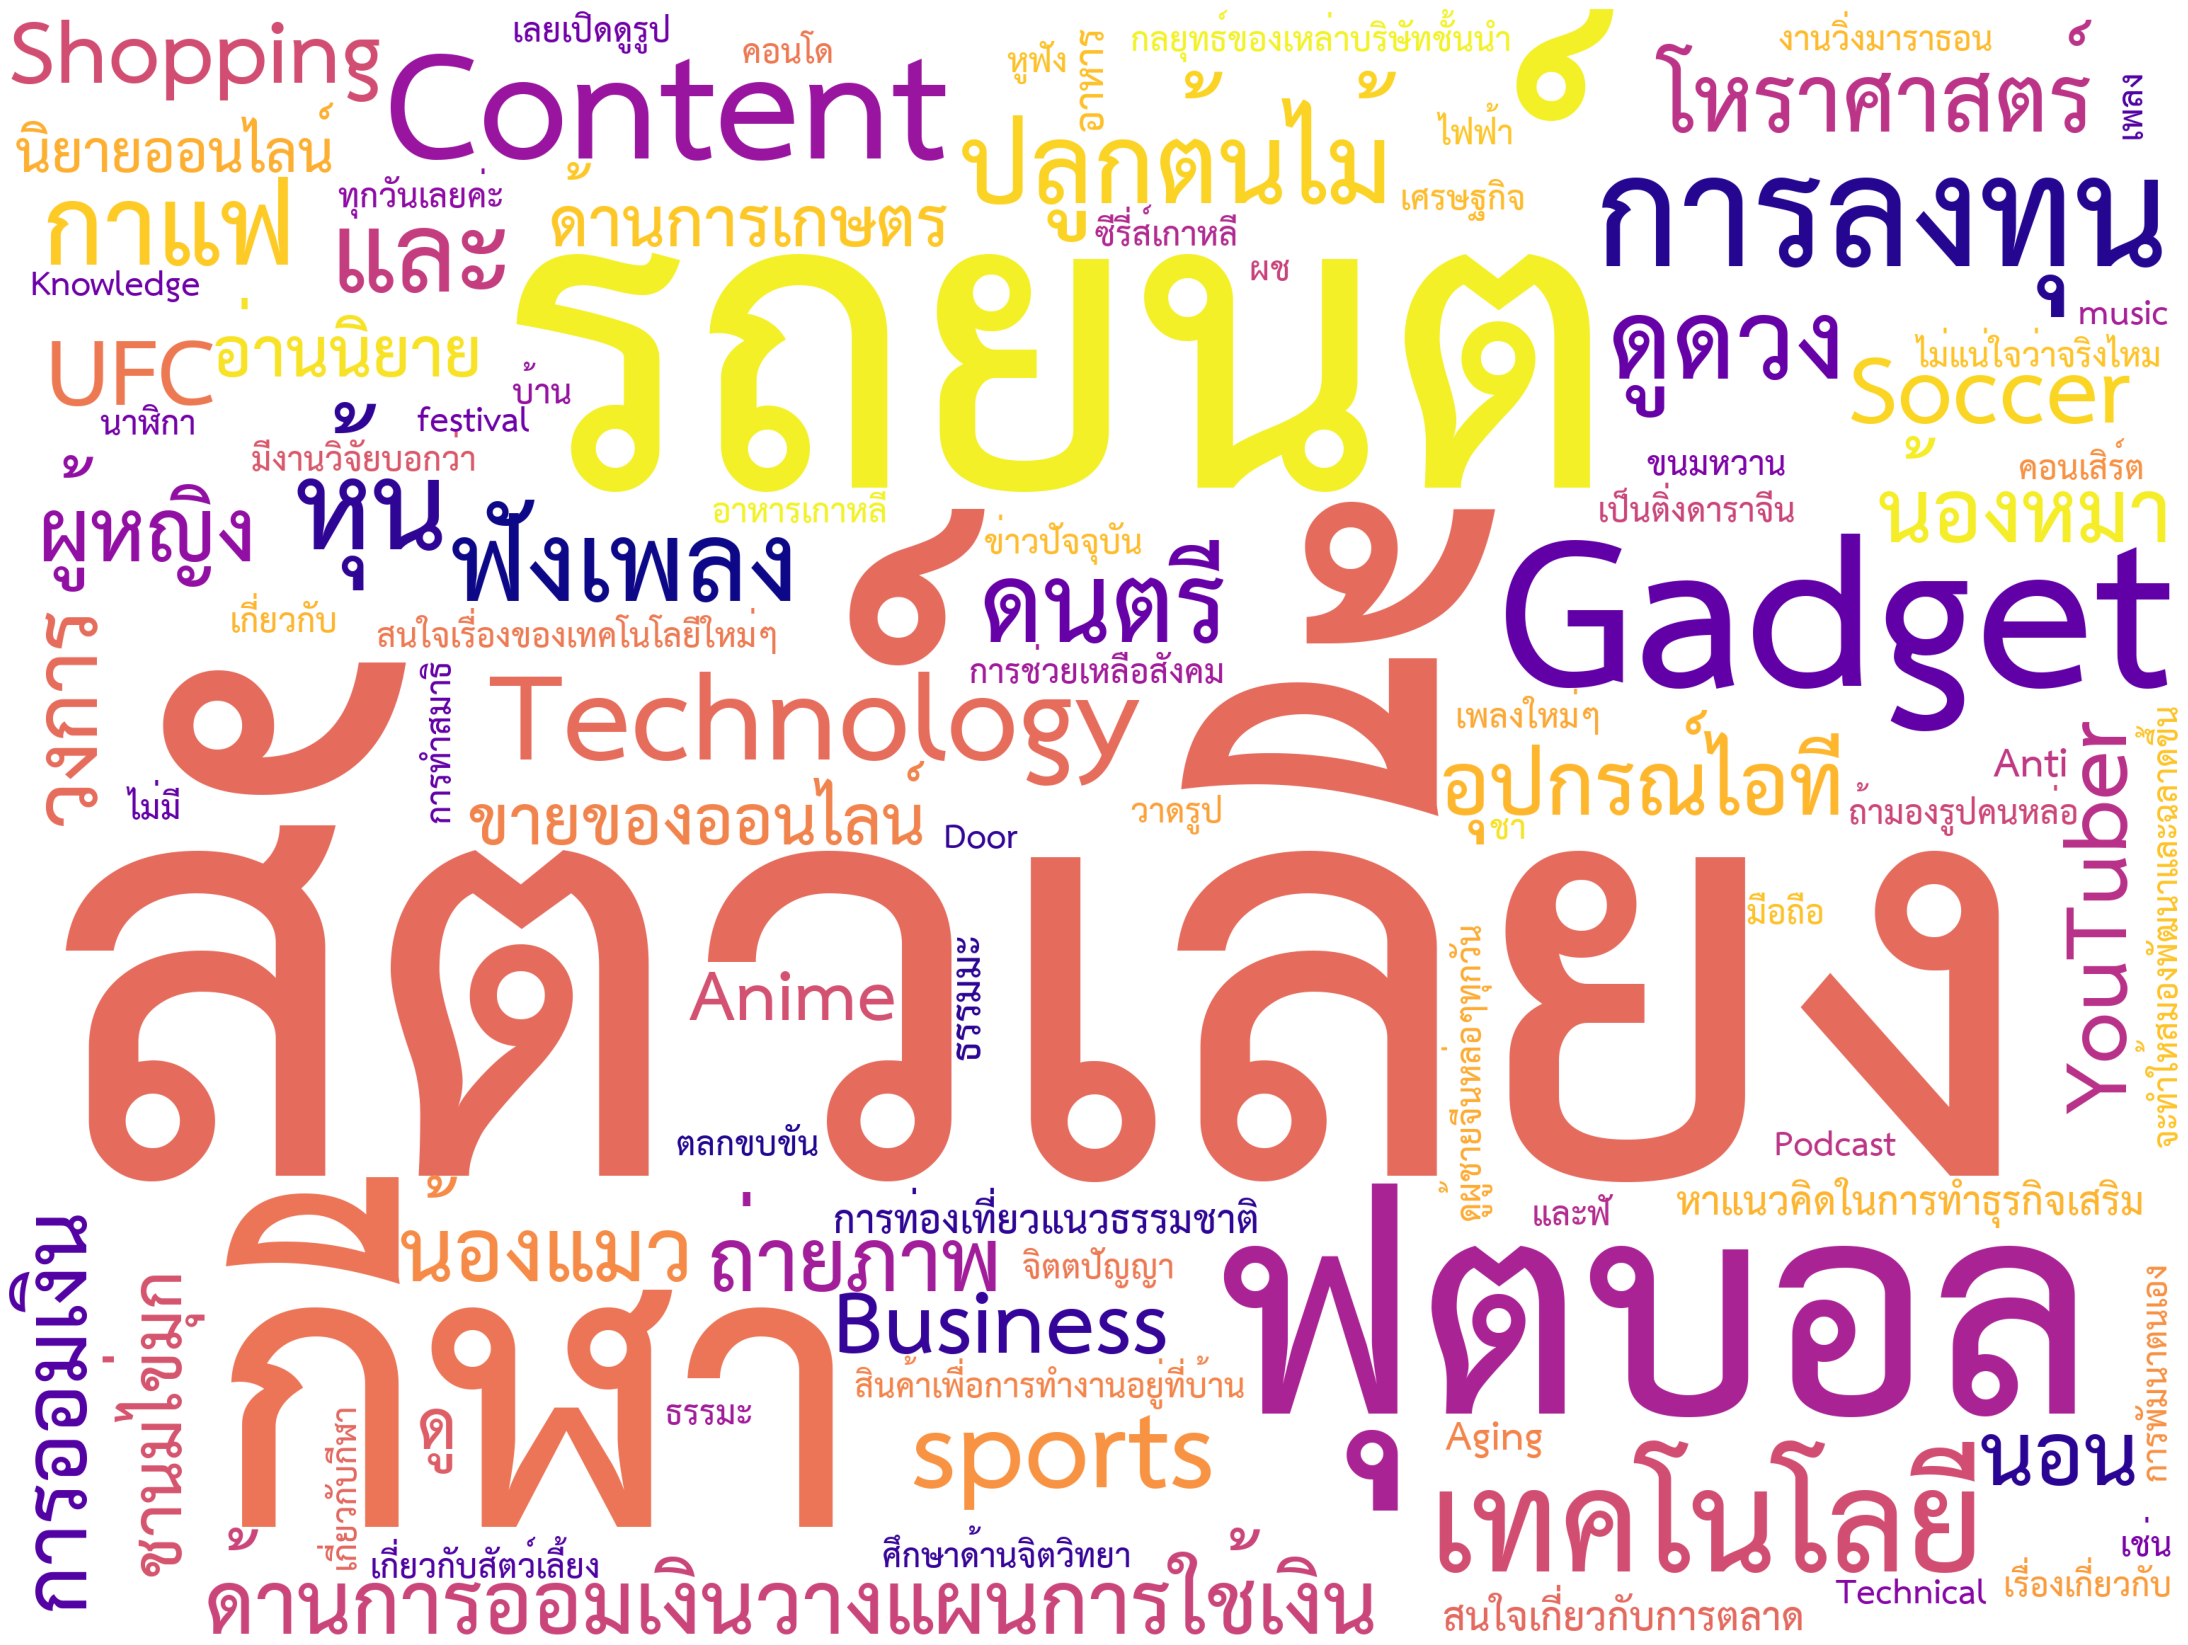

In [ ]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
regexp = r"[ก-๙a-zA-Z']+"    
path = '/content/gdrive/My Drive/BADS_NIDA/CRM/THSarabunNewBold.ttf'  

text=''
for index,row in df_option.iterrows():
  for e in row['Addition'].split(','):
    for e1 in e.split(' '):
      text+= e1+' '

# Import package
#import wordcloud
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud

try:
  wordcloud = WordCloud(
                        font_path=path, 
                        relative_scaling = 0.3,
                        min_font_size=1,
                        background_color="white",
                        width=1024,
                        height=768,
                        max_words=2000, 
                        #mask=mask,
                        colormap='plasma', 
                        scale=3,
                        font_step=4,
                      #   contour_width=3, 
                      #   contour_color='steelblue', 
                        collocations=False,
                        regexp=regexp,
                        margin=2
                        ).generate(text)

  # Plot
  plot_cloud(wordcloud)    
  plt.show()
  wordcloud.to_file("/content/gdrive/My Drive/BADS_NIDA/CRM/AdditionUserFav.png")
except:
  print('WordCloud file is in path:https://github.com/PisutSukpool/BADS7105-CRM-analytics-and-intelligence/raw/main/Homework%201/WordCloud.png')